# Equation of motion for the rocket

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

# Euler's method to solve this problem

In [222]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [236]:
T = 40.0
dt = 0.1 #the timestep
N = int(T/dt)+1
t = numpy.arange(0.0, T + 0.1, 0.1)

$$u_{n+1} = u_n + \Delta t \,f'(u_n).$$
\begin{align}
h_{n+1} & = h_n + \Delta t \, h'_n \\
v_{n+1} & = v_n + \Delta t \, v'_n.
\end{align}
\begin{align}
v'_n & = {dv}/{dt} = (-(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D)/(m_s+m_p)
\end{align}

\begin{align}
u & = \begin{pmatrix} h \\ v \\
\end{pmatrix}
& f(u) & = \begin{pmatrix} v \\ (-(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D)/(m_s+m_p) \end{pmatrix}.
\end{align}

In [237]:
### initial conditions ###
h0 = 0
v0 = 0
h = numpy.zeros(N)
h[0] = h0
v = numpy.zeros(N)
v[0] = v0
u = numpy.array([h0, v0])

In [238]:
# model parameters:
m_s = 50.0 #weight of the rocket shell in kg
g = 9.81 #gravity in m s^{-2}
rho = 1.091 #average air density in kg m^{-3}
r = 0.5 #radius of the rocket in m
A = math.pi * r**2 # maximum cross sectional area of the rocket
v_e = 325.0 #exhaust speed in m/s
C_D = 0.15 #drag coefficient
m_p0 = 100.0 #initial weight of the rocket propellent

In [239]:
m_total = numpy.zeros(N)
for n in range(0, N):
    if n*dt < 5:
        m_pdot = 20.0 # Propellant burn rate in kg/s
        m_total = m_s + (m_p0-n*dt*m_pdot)
        u = u + dt*numpy.array([u[1], (-m_total*g + m_pdot*v_e - 0.5*rho*u[1]*numpy.abs(u[1])*A*C_D)/m_total])
    else:
        m_pdot = 0.0
        m_total = m_s
        u = u + dt*numpy.array([u[1], (-m_total*g + m_pdot*v_e - 0.5*rho*u[1]*numpy.abs(u[1])*A*C_D)/m_total])
        
    h[n] = u[0]
    v[n] = u[1]

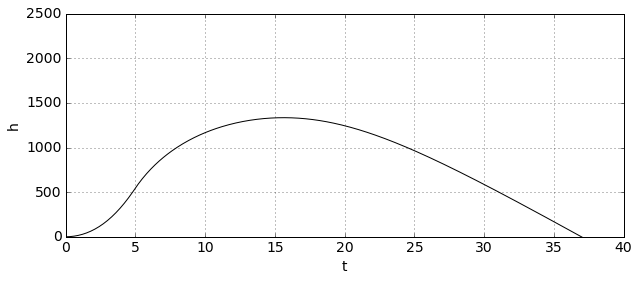

In [240]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.grid(True)
pyplot.ylim(0,2500)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('h', fontsize=14) #y label
pyplot.plot(t,h, 'k-');

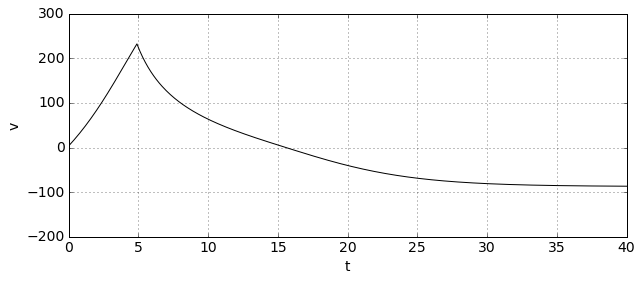

In [241]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.grid(True)
pyplot.ylim(-200,300)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('v', fontsize=14) #y label
pyplot.plot(t,v, 'k-');

In [242]:
max(h)

1334.1829454303072

In [243]:
max(v)

232.10613341261794

In [244]:
for n in range(N):
    if h[n] == max(h):
        print("t = %.*f" % (2,dt*n))

t = 15.60


In [245]:
for n in range(N):
    if v[n] == max(v):
        print("t= %.*f" % (2,dt*n))

t= 4.90


In [246]:
for n in range(N):
    if h[n] <= 0.0:
        print("t= %.*f" % (2,dt*n))

t= 0.00
t= 37.00
t= 37.10
t= 37.20
t= 37.30
t= 37.40
t= 37.50
t= 37.60
t= 37.70
t= 37.80
t= 37.90
t= 38.00
t= 38.10
t= 38.20
t= 38.30
t= 38.40
t= 38.50
t= 38.60
t= 38.70
t= 38.80
t= 38.90
t= 39.00
t= 39.10
t= 39.20
t= 39.30
t= 39.40
t= 39.50
t= 39.60
t= 39.70
t= 39.80
t= 39.90
t= 40.00


In [247]:
v[36.80/dt]

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


-85.91195882374177

In [248]:
h[4.9/dt]

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


523.52283429184774